# Machine Learning

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

REGRESSION

In [2]:
np.random.seed(0)
m = 100
X= np.linspace(0, 10 , m).reshape(m, 1)
y= X + np.random.randn(m ,1)

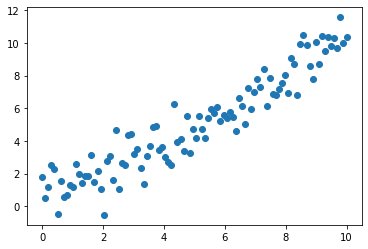

In [10]:
plt.scatter(X, y)
plt.show()

In [11]:
#model = LinearRegression()
model = SVR(C=100)
model.fit(X, y)
#R**2 Coefficient de détermination
model.score(X, y)

c:\Users\kevin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.9060736430308509

ValueError: x and y must be the same size

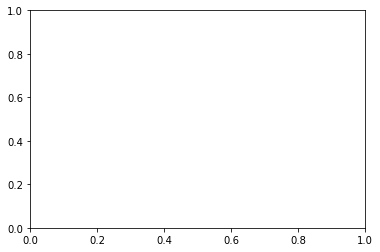

In [23]:
resultat = model.predict(X)
plt.scatter(X, y)
plt.plot( X, resultat, c='y')

Classification

In [13]:
titanic = sns.load_dataset('titanic')
titanic.shape
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [14]:
titanic = titanic [['survived','pclass','sex','age']]
titanic.dropna(axis=0, inplace=True)
titanic['sex'].replace(['male','female'],[0,1],inplace=True)
titanic.head()

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
model = KNeighborsClassifier()

NameError: name 'KNeighborsClassifier' is not defined

In [16]:
y = titanic['survived']
X = titanic.drop('survived', axis= 1)


In [17]:
model.fit(X,y)

SVR(C=100)

In [18]:
model.score(X,y)

0.31994050769708826

In [19]:
#model.predict(X)

In [24]:
def cherif(model , pclass=1, sex=0 , age=37):
    x = np.array([pclass, sex, age]).reshape(1,3)
    #print(model.predict(x))
    print(model.predict_proba(X))

In [25]:
cherif(model)

AttributeError: 'SVR' object has no attribute 'predict_proba'

Train test split
validation set
gridSearch 
Validation Curve

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

Recuperation des x et y score 70%

(150, 4)


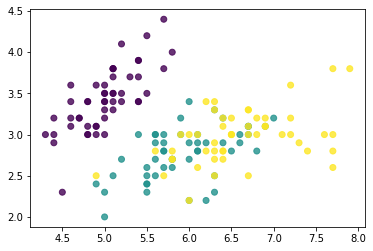

In [73]:
iris = load_iris()

X = iris.data
y = iris.target# cible target

print(X.shape)
plt.scatter(X[: , 0], X[:, 1], c=y, alpha=0.8)# y fait rerference a la target y

In [74]:
from sklearn.model_selection import train_test_split

In [77]:
X_train , X_test , y_train , y_test = train_test_split(X , y , train_size = 0.8 ,random_state=  5)# l'ordre est important sinon erreur
print('les data de Train : ', X_train.shape)
print('les data de Test : ', X_test.shape)

les data de Train :  (120, 4)
les data de Test :  (30, 4)


Splitage des données

Text(0.5, 1.0, 'data de test')

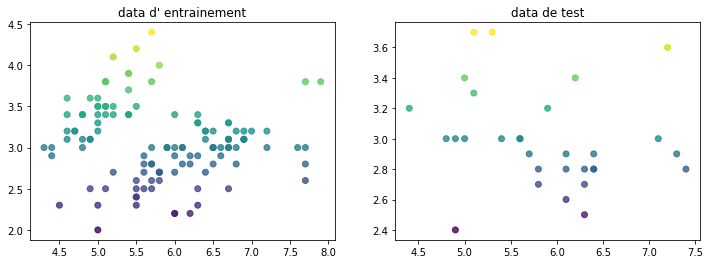

In [78]:
plt.figure(figsize=(12,4))# important pour afficher le graph
plt.subplot(121)
plt.scatter(X_train[: , 0], X_train[:, 1], c=X_train[:,1], alpha=0.8)
plt.title( 'data d\' entrainement')

plt.subplot(122)
plt.scatter(X_test[: , 0], X_test[:, 1], c=X_test[:,1], alpha=0.8)
plt.title( 'data de test')

# creer nun model de machine learning pour predir quel type de fleur

In [98]:
from sklearn.neighbors import KNeighborsClassifier 

In [99]:
#K-NN K plus proche voisins
model = KNeighborsClassifier(n_neighbors=8)# 8 = 100% dans se cas

model.fit(X_train , y_train)

score = model.score(X_test, y_test)
print('Le score de mon model est: ',score)

Le score de mon model est:  1.0


# comprendre le proces puis l'ameliore pour arrivé a 9.999
la Val set sert a evalué le model 
psplit la dat 5 fois et reutilise la data dans plusieur teste puis calcule la moyenne don la plus celui qui a la meilleur moyenne est le bon modele

# StartifieldKFold[ ///   //// ]il prend plusieur partie
# KFold[    /////           ]il prend une seul partie
# ShuffleSplite[ ///  ///  ///]

In [100]:
from sklearn.model_selection import cross_val_score

In [101]:
cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5, scoring='accuracy').mean()# mean = moyenne

0.9833333333333334

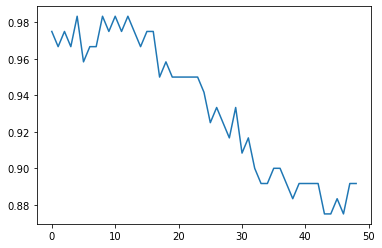

In [102]:
list_score =[]# creation de la liste 
for n_neighbors in range(1,50):# parcour la liste vide et rajoute ma variable 
    resultat_score = cross_val_score(KNeighborsClassifier(n_neighbors), X_train, y_train, cv=5, scoring='accuracy').mean()
    list_score.append(resultat_score)


plt.plot(list_score)# les piques sont les meileur performances
plt.show()

In [103]:
from sklearn.model_selection import validation_curve

C:\Users\kevin\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


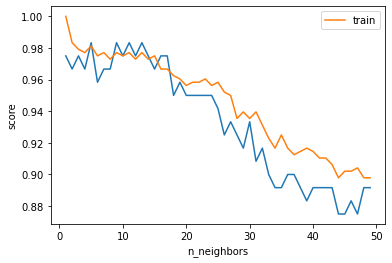

In [104]:
#Validation Curve
model = KNeighborsClassifier()
p = np.arange(1,50)

train_score, val_score = validation_curve(model, X_train,y_train, 'n_neighbors', p , cv=5)

#val_score
#val_score.shape resultat de chaque moyenne
#val_score.mean(axis=1)# on a 49 ligne pour 50 resultat
plt.plot(p,val_score.mean(axis= 1))
plt.plot(p, train_score.mean(axis=1), label='train')

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

OVERFITING a chercher

In [59]:
#GridSearch CV
from sklearn.model_selection import GridSearchCV

In [60]:
dict_param= {'n_neighbors': np.arange(1,80), 'metric' : ['euclidian', 'manhattan']}
#dict_param= {'n_neighbors': np.arange(1,80), 'metric' : ['brute', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), dict_param, cv=7)

grid.fit(X_train , y_train)

c:\Users\kevin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\kevin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\kevin\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "c:\Users\kevin\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "c:\Users\kevin\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'euclidian' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function

GridSearchCV(cv=7, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidian', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79])})

In [61]:
grid.best_score_

0.9747899159663866

In [62]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 1}

In [63]:
model = grid.best_estimator_

In [64]:
model.score(X_test, y_test)

0.8666666666666667

In [65]:
#confusion Matrix: permette de savoir si il y a une erreure
from sklearn.metrics import confusion_matrix

In [66]:
confusion_matrix(y_test , model.predict(X_test))

array([[8, 0, 0],
       [0, 9, 2],
       [0, 2, 9]], dtype=int64)

In [67]:
#Learning curve les courbe d'apprentisages 
from sklearn.model_selection import learning_curve


In [68]:
learning_curve(model, X_train, y_train, train_sizes= np.linspace(0.2,1.0,5), cv = 5)

(array([19, 38, 57, 76, 96]),
 array([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]),
 array([[0.95833333, 0.95833333, 1.        , 0.95833333, 0.91666667],
        [0.95833333, 1.        , 1.        , 0.95833333, 0.95833333],
        [1.        , 1.        , 1.        , 0.95833333, 0.95833333],
        [1.        , 1.        , 0.95833333, 0.95833333, 0.95833333],
        [1.        , 1.        , 0.95833333, 0.95833333, 0.95833333]]))

In [69]:
np.linspace(0.2,1.0,5)

array([0.2, 0.4, 0.6, 0.8, 1. ])

In [77]:
V, train_score, val_score = learning_curve(model , X_train ,y_train, train_sizes=np.linspace(0.2,1.0,50),cv = 5 )
print(V)

[19 20 22 23 25 27 28 30 31 33 34 36 38 39 41 42 44 45 47 48 50 52 53 55
 56 58 59 61 63 64 66 67 69 70 72 74 75 77 78 80 81 83 85 86 88 89 91 92
 94 96]


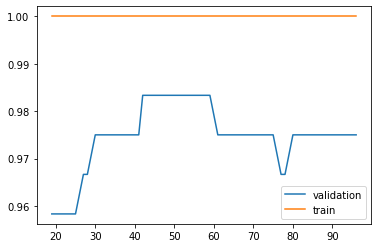

In [78]:

plt.plot(V, val_score.mean(axis=1), label= 'validation')
plt.plot(V, train_score.mean(axis=1), label='train')
plt.legend()


Ameliorer le model d'hier avec le jeu de donnée titanic refaire tous ce que l'on a fais avec un autre jeux de données

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [83]:
titanic = sns.load_dataset('titanic')
titanic.shape
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [91]:


X = titanic.survived
y = titanic.alive# cible target

print(X.shape)
plt.scatter(X[: , 0], X[:, 1], c=y, alpha=0.8)# y fait rerference a la target y

(891,)


ValueError: key of type tuple not found and not a MultiIndex

In [87]:
model = KNeighborsClassifier()


In [88]:
X_train , X_test , y_train , y_test = train_test_split(X , y , train_size = 0.8 ,random_state=  5)# l'ordre est important sinon erreur
print('les data de Train : ', X_train.shape)
print('les data de Test : ', X_test.shape)

les data de Train :  (120, 4)
les data de Test :  (30, 4)


Text(0.5, 1.0, 'data de test')

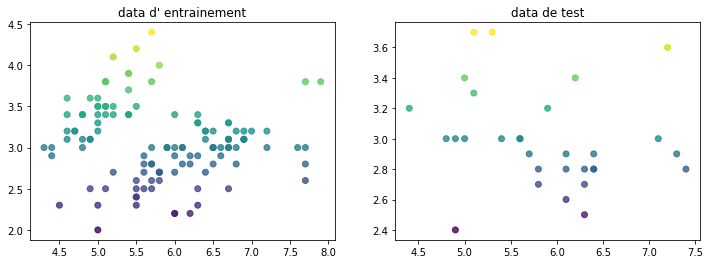

In [89]:
plt.figure(figsize=(12,4))# important pour afficher le graph
plt.subplot(121)
plt.scatter(X_train[: , 0], X_train[:, 1], c=X_train[:,1], alpha=0.8)
plt.title( 'data d\' entrainement')

plt.subplot(122)
plt.scatter(X_test[: , 0], X_test[:, 1], c=X_test[:,1], alpha=0.8)
plt.title( 'data de test')

In [82]:
titanic = titanic [['survived','pclass','sex','age']]
titanic.dropna(axis=0, inplace=True)
titanic['sex'].replace(['male','female'],[0,1],inplace=True)
titanic.head()

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


# Apprentissage Non supervisé

non superviser la data ne contien pas les featurs et les label , la machine en se basent sur des critere pour fair deu clustereing